Konsep Clustering (Mengelompokkan data ke dlm beberapa cluster)

Alur : 
1. Import Library
2. Load Dataset
3. Select Feature
4. Determine Number of Cluster (Elbow &Silhoutte Coefficient)
5. Create Cluster
6. Show Cluster


Implementasi data duimmy make blobs

Metode K-means = clustering paling sederhana. Bisa mengelompokkan jumlah yg cukup besar dgn waktu komputasi yg cepat & efisien.

In [1]:
# import data
import numpy as np #untuk bekerja dlm array & math
import pandas as pd #dataframe
from matplotlib import pyplot as plt #plotting
from sklearn.datasets import make_blobs #generate data
from sklearn.cluster import KMeans #algoritma utama (kmeans)

from sklearn.metrics import silhouette_score #(menentukan angka cluster)

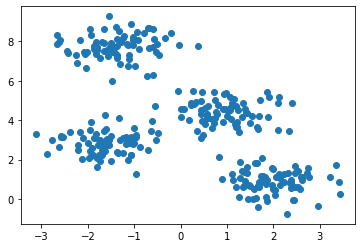

In [4]:
# load dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0) #make_blob=dataset yg dapat dimodelkan oleh Kmeans
# n_sample = jumlah data
# centers = jumlah cluster
# cluster_std = standar cluster ?

plt.scatter(X[:,0],X[:,1])

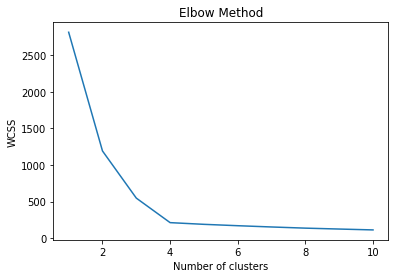

In [5]:
# determine number of clusters
# berfungsi untukl menentukan jumlah cluster yg optimal

# method 1 elbow method (SSE)=>utk menentukan jumlah cluster terbaik dgn cara melihat presentase hasil perbandingan anatar jumlah cluster yang akan membentuk siku pda suatu titik
#  menggunakan sum of search
# lihat grafik yg punya sudut penurunan

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# metode 2 silhoutte coefficient
# pembanding yg lebih jelas sih
silhouette_coefficients = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

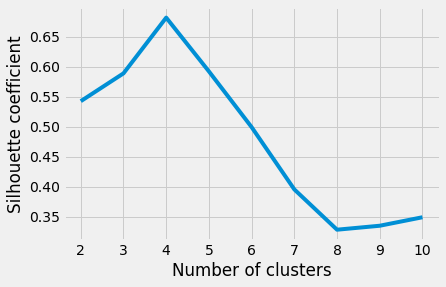

In [7]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

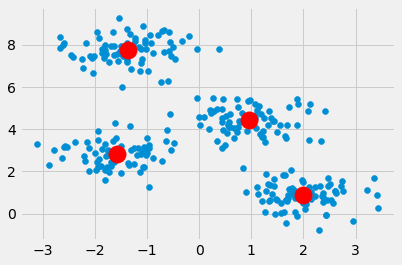

In [ ]:
# create cluster
kmeans = KMeans(n_clusters=4, init="k-means++",max_iter=300, 
                   n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1]) 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red')

plt.show()

# Implementasi 2 - mall customer segmentation

In [8]:
# import data
import numpy as np
import pandas as pd

# visualisasi package
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# menentukan jumlah cluster
from sklearn.metrics import silhouette_score

In [9]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [10]:
# proses EDA
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


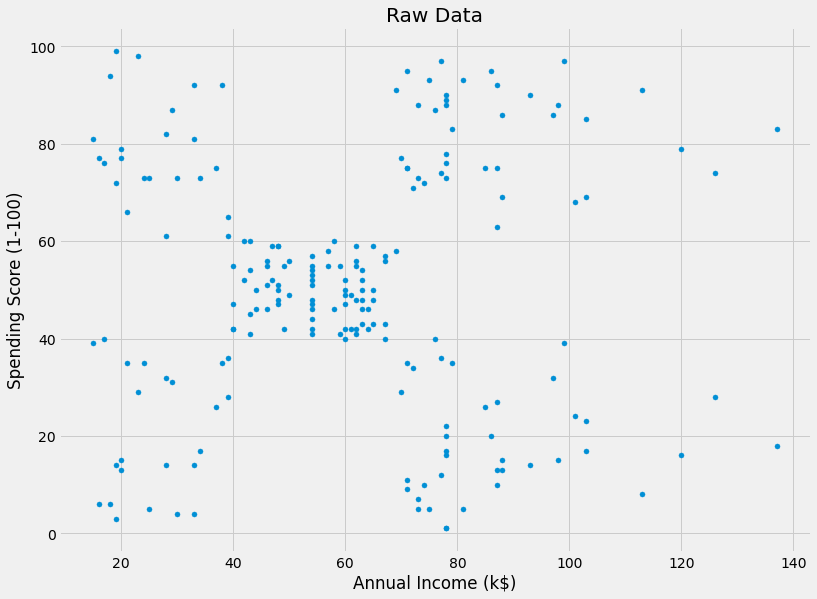

In [13]:
plt.figure(figsize=(12,9))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s=25)
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# data preprocessing
# select feature

In [14]:
X=np.array(df.iloc[:,[3,4]])

In [15]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

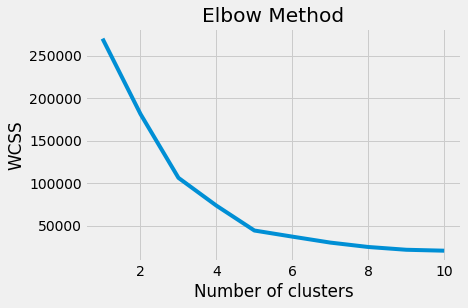

In [16]:
# determine number of clusters
# elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
silhouette_coefficients = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

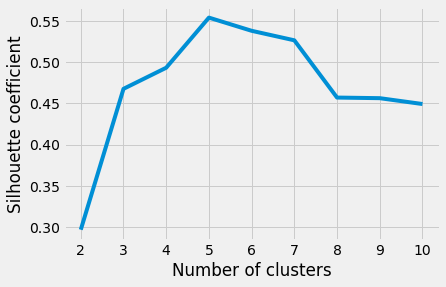

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [26]:
# create cluster
kmeans = KMeans(n_clusters=5, init='k-means++',
                  max_iter=500, n_init=10, random_state=0)
kmeans_preds =  kmeans.fit_predict(X)

In [27]:
kmeans_preds

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

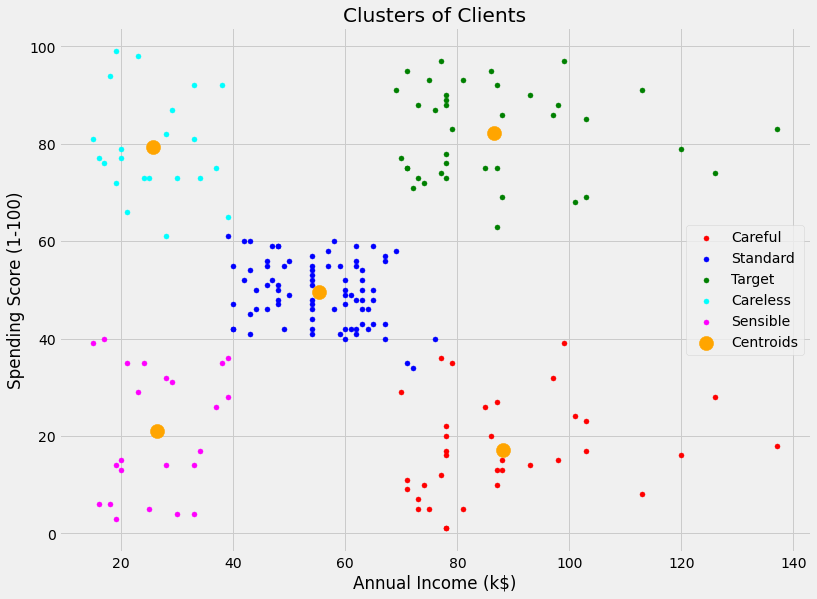

In [28]:
# show cluster
point_size=25
colors=['red', 'blue', 'green', 'cyan', 'magenta']
labels=['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize=(12,9))
for i in range(5):
  plt.scatter(X[kmeans_pred == i,0], X[kmeans_pred == i,1], s= point_size,
              c=colors[i], label=labels[i])
  
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200,
            c='orange', label='Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()

In [29]:
df['Cluster'] = kmeans_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [32]:
df.groupby(['Cluster'])['Cluster'].count()

Cluster
0    35
1    81
2    39
3    22
4    23
Name: Cluster, dtype: int64

In [35]:
df.loc[df['Cluster']==2].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2


In [36]:
print(kmeans.predict([[100,20]]))

[0]


# Multi Features Clustering

In [47]:
# import library
import plotly as py
import plotly.graph_objs as go

In [38]:
#  data preprocessing
# select feature

X=np.array(df.iloc[:,[2,3,4]])

In [39]:
X[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]])

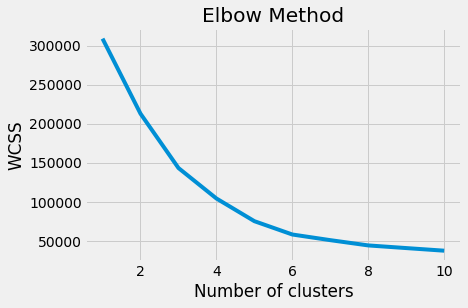

In [40]:
# menentukanjumlah cluster
# method elbow
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
silhouette_coefficients = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

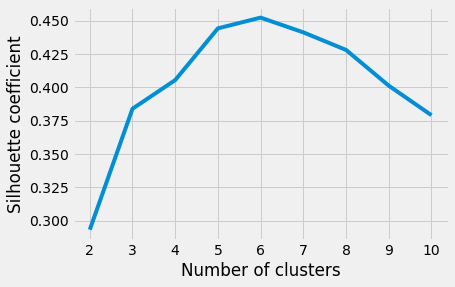

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [50]:
# create cluster
kmeans = KMeans(n_clusters=6, init='k-means++',
                  max_iter=500, n_init=10, random_state=0)
kmeans_preds =  kmeans.fit_predict(X)

In [51]:
kmeans_preds

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [52]:
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

df['ClusterMultiFeatures'] = labels3

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['ClusterMultiFeatures'],
        size=20,
        line=dict(
            color=df['ClusterMultiFeatures'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score (1-100)'),
        zaxis = dict(title = 'Annual Income (k$)'),
    )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [53]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMultiFeatures
0,1,Male,19,15,39,4,5
1,2,Male,21,15,81,3,4
2,3,Female,20,16,6,4,5
3,4,Female,23,16,77,3,4
4,5,Female,31,17,40,4,5


In [55]:
df.groupby(['ClusterMultiFeatures'])['ClusterMultiFeatures'].count()

ClusterMultiFeatures
0    38
1    45
2    35
3    39
4    22
5    21
Name: ClusterMultiFeatures, dtype: int64

In [56]:
df.loc[df['ClusterMultiFeatures']==2].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,ClusterMultiFeatures
126,127,Male,43,71,35,1,2
128,129,Male,59,71,11,0,2
130,131,Male,47,71,9,0,2
134,135,Male,20,73,5,0,2
136,137,Female,44,73,7,0,2


In [57]:
print(kmeans.predict([[39,80,80]]))

[3]
